# Clustering the Countries by using K-means, Heirarchical and PCA 

## **Objective**:
To categorise the countries using socio-economic and health factors that determine the overall development of the country.

## **About organization**: 
HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities.

## **Problem Statement**: 
HELP International have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. So, CEO has to make decision to choose the countries that are in the direst need of aid.  Hence, My job as a Data analyst is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then I need to suggest the countries which the CEO needs to focus on the most.

# step 1 : Importing Libraries

In [1]:
# Importing libraries
import numpy as np
import pandas as pd

# for visulisation
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# for ignore warning 
import warnings
warnings.filterwarnings('ignore')

# for display maximum number of rows and columns
from IPython.display import display
pd.set_option('display.max_columns', 500)
pd.options.display.max_rows = 300


In [2]:
# For scaling the data
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler

# To perform PCA
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

# To perform K-means clustering
from sklearn.cluster import KMeans

#To perform hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

from sklearn.metrics import silhouette_score

# Step 2 : Load the Data

In [3]:
# load the data
country = pd.read_csv(r"C:\Users\Niks\Downloads\ML-1\Assignement (clustering & PCA)\Country-data.csv")
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


# Step 3 : Inspect the Dataframe

In [4]:
# Inspect the number of rows and columns
country.shape

(167, 10)

In [5]:
# Checking the datatypes of each variable
country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


- From above datatype information income and Gdpp datatype are in incorrect formet so we have to make them in correct formet

In [6]:
# change the datatye int64 to float
country['income'] = country['income'].astype(float)
country['gdpp'] = country['gdpp'].astype(float)

In [7]:
# check the Datatype
country.dtypes

country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income        float64
inflation     float64
life_expec    float64
total_fer     float64
gdpp          float64
dtype: object

- in the dataset exports, heath and imports variables are in percenatge of the total GDP format. 
- So,we have to converted into actual value basis of GDPP.

In [8]:
country['exports'] = country['exports']*country['gdpp']/100
country['imports'] = country['imports']*country['gdpp']/100
country['health'] = country['health']*country['gdpp']/100

In [9]:
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0


In [10]:
## check summary of data
country.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,183750.000000,8663.600000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [11]:
# Checking for Nulls and Duplicates

(country.isnull().sum()/len(country.index))*100

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

#### As we can see there is no missing data(null,NaN values) in the DataSet
- We can see there is No Missing and No Duplicate value in the Dataset.

In [12]:
# pop the country from the dataset before scaling
y = country.pop("country")

In [13]:
# check the dataframe after pop country
country.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0
1,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0
2,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0
3,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0
4,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0


## Checking the outllier in the DataSet

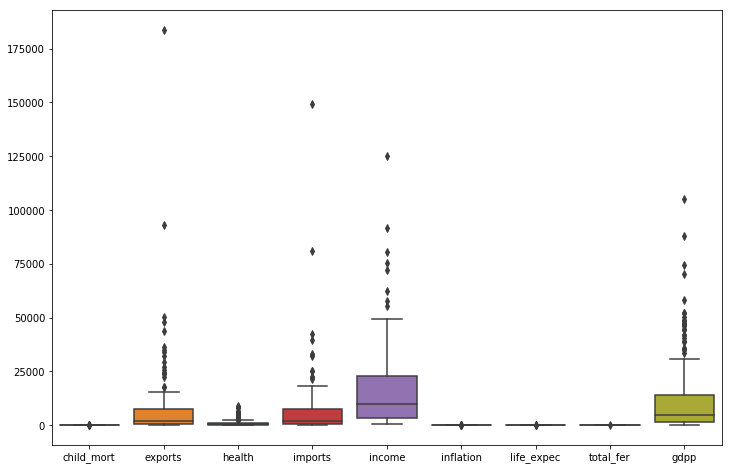

In [14]:
fig = plt.figure(figsize = (12,8))
sns.boxplot(data=country)
plt.show()

- As we cah see in the above fig there is a some outliers in the field of exports,imports,income,gdpp.

# Step 4 : Check the Correlation Matrix

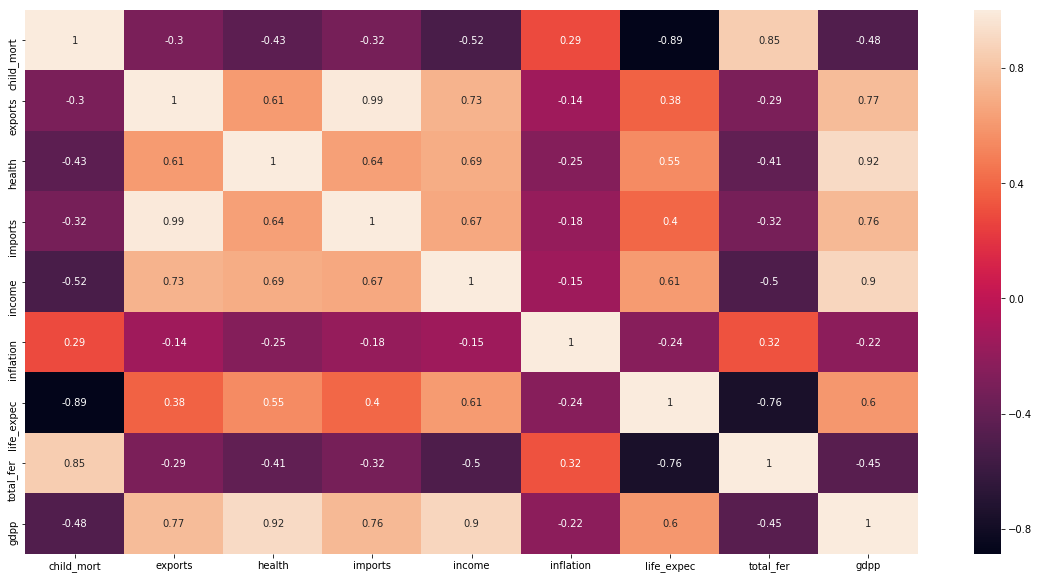

In [15]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(country.corr(),annot = True)

- As we can see exorts and imports ,health and gdpp,gdpp and income are highly correlated with each other.

# Step 4 : Data Preparation

## 4.1 Scaling the Data

In [16]:
scaler = StandardScaler()

In [17]:
country1 = scaler.fit_transform(country)

In [18]:
country1

array([[ 1.29153238, -0.4110113 , -0.56503989, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.35019096, -0.43921769, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.31852577, -0.48482608, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541, -0.36146329, -0.53848844, ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.39216643, -0.55059641, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.38395214, -0.54049845, ..., -2.09278484,
         1.6246091 , -0.62954556]])

In [19]:
# Check maximum value here
country1.max()

9.839814177922182

## Step 4.2 : Perform PCA

We can now execute a Principal Component Analysis(PCA) to the obtained dataframe. This will reduce the number of features from the number of Country Dataset, then numbr of principal components I have chosen.

In [20]:
pca = PCA(svd_solver='randomized', random_state=42)

In [21]:
# fiting PCA on the dataset
pca.fit(country1)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

   ###  Components from the PCA

In [23]:
pca.components_

array([[-0.31639186,  0.34288671,  0.358535  ,  0.34486492,  0.38004113,
        -0.14308531,  0.34385651, -0.30284224,  0.39998795],
       [ 0.47626735,  0.39731091,  0.1550529 ,  0.37078075,  0.12838448,
         0.22126089, -0.36981973,  0.4597152 ,  0.2006241 ],
       [-0.15001225, -0.03057367, -0.07570322, -0.07217386,  0.14576421,
         0.94841868,  0.19675173, -0.07783431,  0.01033941],
       [-0.14805195,  0.44942527, -0.59971228,  0.46179779, -0.15480592,
        -0.00762798, -0.01839465, -0.21392805, -0.36477239],
       [ 0.1019948 , -0.03853829, -0.49319984, -0.2527867 ,  0.79407469,
        -0.13642345, -0.15404105, -0.02033568,  0.08750149],
       [ 0.19658519, -0.03891112,  0.18069888, -0.01217988, -0.03814681,
         0.10840284, -0.58600986, -0.75390075,  0.04538167],
       [ 0.76126725, -0.01366973, -0.06461567,  0.02718244, -0.02311312,
        -0.02207663,  0.58120846, -0.27314534, -0.04402264],
       [ 0.00644411, -0.05526371,  0.43007213,  0.1311355 ,  0

 ### Looking at the explained variance ratio for each component

In [24]:
pca.explained_variance_ratio_

array([5.89372984e-01, 1.84451685e-01, 9.91147170e-02, 6.07227801e-02,
       3.02917253e-02, 2.45982702e-02, 9.39743701e-03, 1.55641971e-03,
       4.93981394e-04])

Text(0.5,1,'Explain Variance')

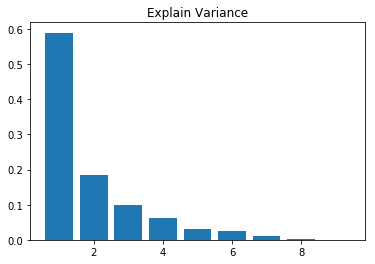

In [25]:
# making Bar plot to explain Variance
plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_ )
plt.title('Explain Variance')

###  Making a scree plot for the explained variance

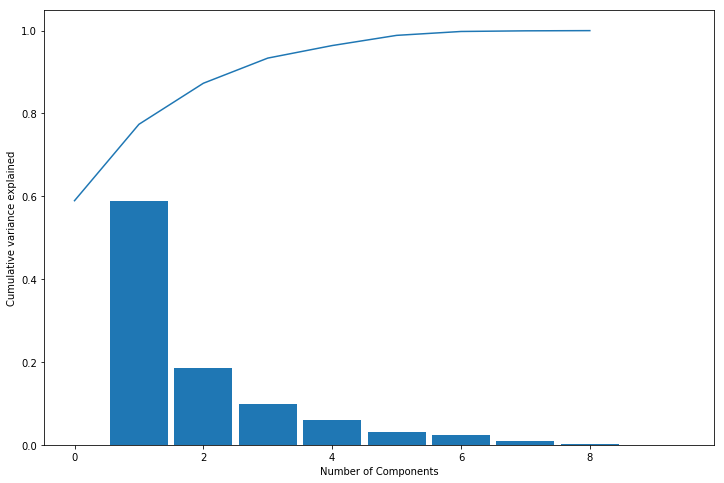

In [27]:
fig = plt.figure(figsize=[12,8])
plt.plot(np.cumsum(pca.explained_variance_ratio_))

# making Bar plot to explain Variance
plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_ , width = 0.9)
plt.xlabel("Number of Components")
plt.ylabel("Cumulative variance explained")
plt.savefig("SCREEPLOT",bbox_inches='tight')
plt.show()


#### From above scree plot, Around 98% of the information is being explained through 5 components.

###  We Can Perform Incremental PCA with 5 Components

In [28]:
#Finally let's go ahead and do dimenstionality reduction using the five Principal Components
pca_final = IncrementalPCA(n_components=5)

In [29]:
pca_final

IncrementalPCA(batch_size=None, copy=True, n_components=5, whiten=False)

In [30]:
country2 = pca_final.fit_transform(country1)
country2.shape

(167, 5)

### Creating transpose so each column is properly arranged

In [31]:
country3 = np.transpose(country2)

### correlation matrix for the PC

In [32]:
corrmat = np.corrcoef(country3)
corrmat

array([[ 1.00000000e+00,  8.95967973e-04, -3.43490594e-05,
        -3.67755465e-03, -3.09237607e-03],
       [ 8.95967973e-04,  1.00000000e+00,  7.35197281e-05,
        -1.37774134e-02, -1.17495000e-02],
       [-3.43490594e-05,  7.35197281e-05,  1.00000000e+00,
         6.15541928e-05, -5.85496474e-04],
       [-3.67755465e-03, -1.37774134e-02,  6.15541928e-05,
         1.00000000e+00,  4.75010096e-02],
       [-3.09237607e-03, -1.17495000e-02, -5.85496474e-04,
         4.75010096e-02,  1.00000000e+00]])

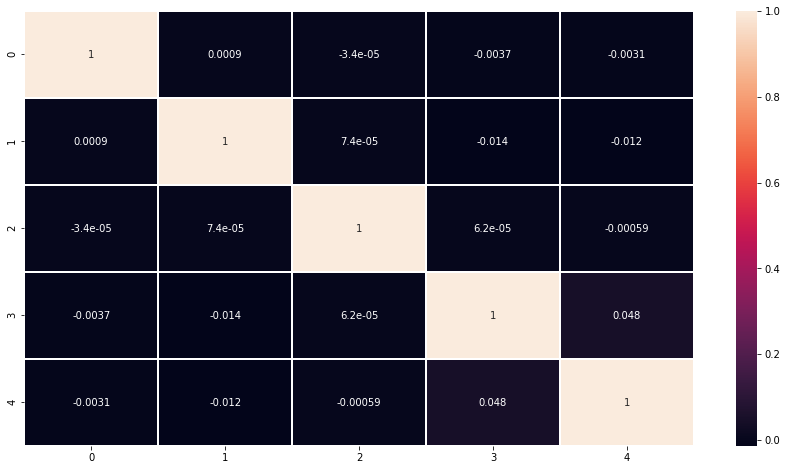

In [33]:
plt.figure(figsize=[15,8])
sns.heatmap(corrmat, annot=True,linewidths=.5)

- From the heat map we can see that no any components can correlated with each other

### Creating DataFrame of all 5 Principal Components 

In [34]:
country4 = pd.DataFrame({'PC1':country3[0],'PC2':country3[1],'PC3':country3[2],'PC4':country3[3],'PC5':country3[4]})
country4.head()

,PC1,PC2,PC3,PC4,PC5
0,-2.636338,1.472260,-0.548330,0.238302,0.061003
1,-0.023783,-1.435535,-0.015470,-0.428278,-0.154305
2,-0.459228,-0.679705,0.956537,-0.193531,-0.092128
3,-2.723472,2.174966,0.597397,0.417695,0.056694
4,0.649103,-1.026404,-0.258645,-0.276882,0.077087


# Step 5 : Checking Outlier in New Dataset After Perform PCA

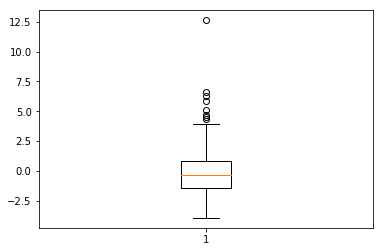

In [35]:
## Let's perform Outlier Analysis
#Let's do the outlier analysis before proceeding to clustering

# For PC1
plt.boxplot(country4.PC1)
Q1 = country4.PC1.quantile(0.05)
Q3 = country4.PC1.quantile(0.95)
plt.savefig("Boxplot1",bbox_inches='tight')
pcs_df2 = country4[(country4.PC1 >= Q1) & (country4.PC1 <= Q3)]

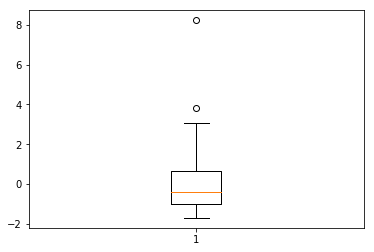

In [36]:
# For PC1
plt.boxplot(country4.PC2)
Q1 = country4.PC2.quantile(0.05)
Q3 = country4.PC2.quantile(0.95)
pcs_df2 = country4[(country4.PC2 >= Q1) & (country4.PC2 <= Q3)]

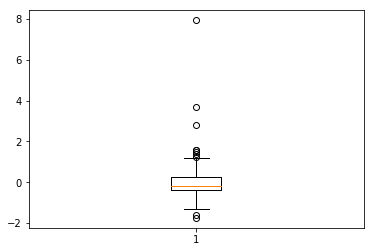

In [37]:
# For PC1
plt.boxplot(country4.PC3)
Q1 = country4.PC3.quantile(0.05)
Q3 = country4.PC3.quantile(0.95)
plt.savefig("Boxplot2",bbox_inches='tight')
pcs_df2 = country4[(country4.PC3 >= Q1) & (country4.PC3 <= Q3)]

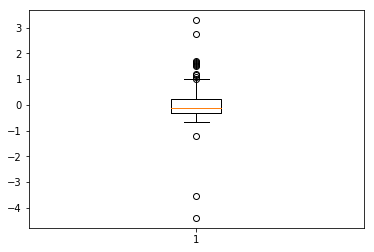

In [38]:
# For PC1
plt.boxplot(country4.PC4)
Q1 = country4.PC4.quantile(0.05)
Q3 = country4.PC4.quantile(0.95)
pcs_df2 = country4[(country4.PC4 >= Q1) & (country4.PC4 <= Q3)]

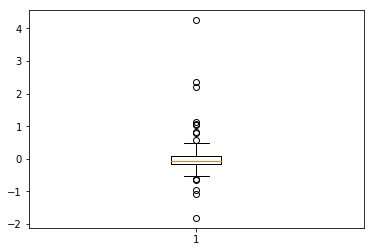

In [39]:
# For PC1
plt.boxplot(country4.PC5)
Q1 = country4.PC5.quantile(0.05)
Q3 = country4.PC5.quantile(0.95)
pcs_df2 = country4[(country4.PC5 >= Q1) & (country4.PC5 <= Q3)]

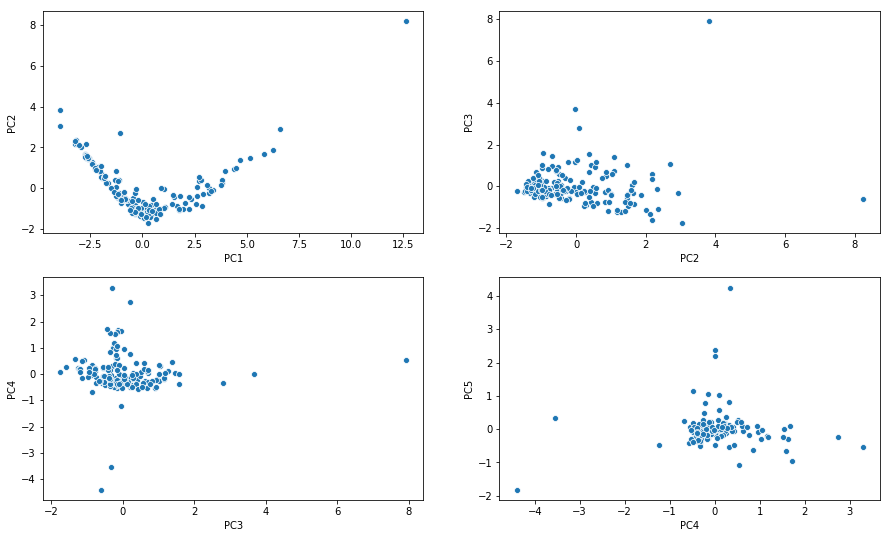

In [41]:
# Create the Scatter plot to visualize the outlier
fig = plt.figure(figsize = (15,9))

plt.subplot(2, 2, 1)
sns.scatterplot(x='PC1',y='PC2',data=country4)

plt.subplot(2, 2, 2)
sns.scatterplot(x='PC2',y='PC3',data=country4)

plt.subplot(2, 2, 3)
sns.scatterplot(x='PC3',y='PC4',data=country4)

plt.subplot(2, 2, 4)
sns.scatterplot(x='PC4',y='PC5',data=country4)
plt.savefig("scatterplot",bbox_inches='tight')

We can clearly see there is some outliers in the Data.

### As we can see there is only few outliers in the data. Both Axis data lies on the 0 position so we Can't Remove the Outlier

# Step 6 : Perform K-means Clustering

## Step 6.1 : Perform the Hopekins Statistic 

The Hopkins statistic, is a statistic which gives a value which indicates the cluster tendency, in other words: how well the data can be clustered.

- If the value is between {0.01, ...,0.3}, the data is regularly spaced.

- If the value is around 0.5, it is random.

- If the value is between {0.7, ..., 0.99}, it has a high tendency to cluster.

In [42]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [43]:
#Use the Hopkins Statistic function by passing the above dataframe as a paramter
hopkins(country4)

0.919316653982382

### So the value is > 0.5 the given dataset has a good tendency to form clusters.

In [44]:
country5 = country4

In [45]:
country5.head()

,PC1,PC2,PC3,PC4,PC5
0,-2.636338,1.472260,-0.548330,0.238302,0.061003
1,-0.023783,-1.435535,-0.015470,-0.428278,-0.154305
2,-0.459228,-0.679705,0.956537,-0.193531,-0.092128
3,-2.723472,2.174966,0.597397,0.417695,0.056694
4,0.649103,-1.026404,-0.258645,-0.276882,0.077087


In [46]:
#help(KMeans)

## 6.2 : Modeling :Finding the Optimal Number of Clusters

### 6.2.1 SSD

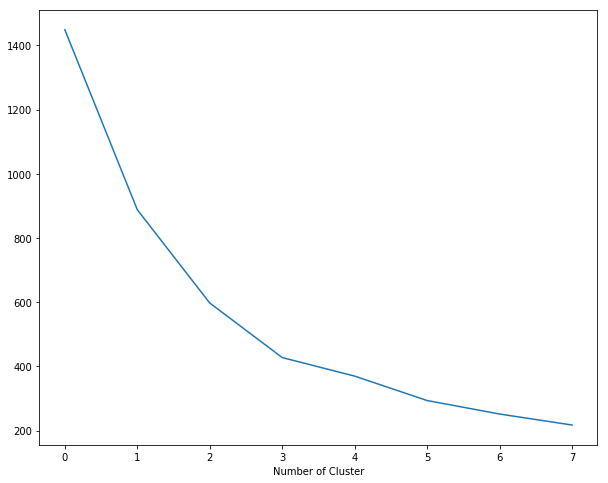

In [47]:
# elbow-curve/SSD
fig = plt.figure(figsize=[10,8])
ssd = []
range_n_clusters = [1,2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(country5)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)
plt.xlabel("Number of Cluster")
plt.savefig("elowcurve",bbox_inches='tight')

-  we are seeing a bend at around 3 clusters. Hence, checking with Silhouette Analysis also .

### 6.2 :  Silhouette Analysis 

- We Can Perform the K - means using K = 3 as per the Elow curve result.

In [48]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(country4)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(country4, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.48066046782755917
For n_clusters=3, the silhouette score is 0.45415128979715086
For n_clusters=4, the silhouette score is 0.46298146414826097
For n_clusters=5, the silhouette score is 0.46500328500357135
For n_clusters=6, the silhouette score is 0.4420017760570349
For n_clusters=7, the silhouette score is 0.35436988958499066
For n_clusters=8, the silhouette score is 0.3372217836720519


#### As per the Elbow cure we decide to choose K = 3

In [49]:
# final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50,random_state = 50)
kmeans.fit(country5)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=50, tol=0.0001, verbose=0)

In [50]:
kmeans.labels_

array([2, 1, 1, 2, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 2,
       1, 0, 1, 2, 2, 1, 2, 0, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 0, 1,
       0, 1, 1, 1, 1, 2, 2, 1, 1, 0, 0, 2, 2, 1, 0, 2, 1, 1, 1, 2, 2, 1,
       2, 1, 0, 1, 1, 1, 2, 0, 1, 0, 1, 0, 1, 1, 2, 2, 0, 1, 2, 1, 1, 2,
       2, 1, 1, 0, 1, 2, 2, 1, 1, 2, 0, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1,
       0, 0, 2, 2, 0, 1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 2, 1, 1,
       2, 0, 1, 1, 2, 2, 1, 0, 1, 1, 2, 1, 0, 0, 1, 2, 1, 2, 2, 1, 1, 1,
       1, 2, 1, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2])

In [51]:
# assign the label
country5['cluster_id(K-means)'] = kmeans.labels_
country5.head()

,PC1,PC2,PC3,PC4,PC5,cluster_id(K-means)
0,-2.636338,1.472260,-0.548330,0.238302,0.061003,2
1,-0.023783,-1.435535,-0.015470,-0.428278,-0.154305,1
2,-0.459228,-0.679705,0.956537,-0.193531,-0.092128,1
3,-2.723472,2.174966,0.597397,0.417695,0.056694,2
4,0.649103,-1.026404,-0.258645,-0.276882,0.077087,1


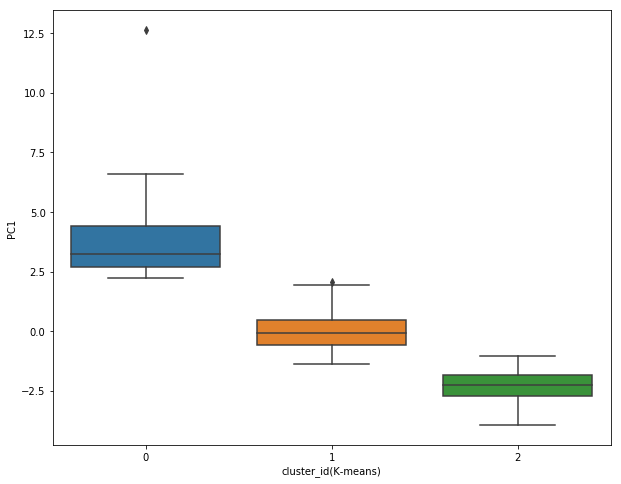

In [52]:
# plot
fig = plt.figure(figsize=[10,8])
sns.boxplot(x='cluster_id(K-means)', y='PC1', data=country5)

In [53]:
country5['cluster_id(K-means)'].value_counts()

1    91
2    48
0    28
Name: cluster_id(K-means), dtype: int64

## Step 8 : Let's merge the original data with the data(ClusterID)

In [54]:
# merge the Country with original Dataset
country6 = pd.concat([y,country], axis=1)
country6.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0


In [55]:
country_final = pd.concat([country6,country5], axis=1)
country_final.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4,PC5,cluster_id(K-means)
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,-2.636338,1.472260,-0.548330,0.238302,0.061003,2
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,-0.023783,-1.435535,-0.015470,-0.428278,-0.154305,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,-0.459228,-0.679705,0.956537,-0.193531,-0.092128,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,-2.723472,2.174966,0.597397,0.417695,0.056694,2
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,0.649103,-1.026404,-0.258645,-0.276882,0.077087,1


### 8.1 Now Drop all the Principal Components from the dataset 

In [56]:
# We dont need that Principal components for the further analysis.
country_final=country_final.drop(['PC1','PC2','PC3','PC4','PC5'],axis=1)
country_final.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id(K-means)
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,2
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,2
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,1


## Step 9 : Analyse the K-means cluster

In [57]:
# Let's profile the cluster by taking the mean of various attributes

clu_child_mort = pd.DataFrame(country_final.groupby(["cluster_id(K-means)"]).child_mort.mean())
clu_exports    = pd.DataFrame(country_final.groupby(["cluster_id(K-means)"]).exports.mean())
clu_health     = pd.DataFrame(country_final.groupby(["cluster_id(K-means)"]).health.mean())
clu_imports    = pd.DataFrame(country_final.groupby(["cluster_id(K-means)"]).imports.mean())
clu_income     = pd.DataFrame(country_final.groupby(["cluster_id(K-means)"]).income.mean())
clu_inflation  = pd.DataFrame(country_final.groupby(["cluster_id(K-means)"]).inflation.mean())
clu_life_expec = pd.DataFrame(country_final.groupby(["cluster_id(K-means)"]).life_expec.mean())
clu_total_fer  = pd.DataFrame(country_final.groupby(["cluster_id(K-means)"]).total_fer.mean())
clu_GDPP       = pd.DataFrame(country_final.groupby(["cluster_id(K-means)"]).gdpp.mean())

### 9.2 Let's concat the resultant with the Cluster ID columns

In [58]:
country_final1 = pd.concat([clu_child_mort,clu_exports,clu_health,clu_imports,clu_income,
                            clu_inflation,clu_life_expec,clu_total_fer,clu_GDPP], axis=1)

In [59]:
country_final1

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
cluster_id(K-means),,,,,,,,,
0,5.046429,31038.239286,4327.163214,25818.100000,50178.571429,3.014679,80.514286,1.760714,48114.285714
1,20.357143,3604.149434,547.279455,3710.446386,13968.021978,7.070549,73.460440,2.235055,7979.912088
2,91.610417,879.063521,114.821765,827.028771,3897.354167,11.911146,59.239583,4.992083,1909.208333


In [60]:
country_final1.columns = ["child_mort","exports","health","imports","income","inflation","life_expec","total_fer","gdpp"]
country_final1

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
cluster_id(K-means),,,,,,,,,
0,5.046429,31038.239286,4327.163214,25818.100000,50178.571429,3.014679,80.514286,1.760714,48114.285714
1,20.357143,3604.149434,547.279455,3710.446386,13968.021978,7.070549,73.460440,2.235055,7979.912088
2,91.610417,879.063521,114.821765,827.028771,3897.354167,11.911146,59.239583,4.992083,1909.208333


### 9.3 : Finding the observations that belong to certain cluster

- Probelm statment : analyse the clusters by comparing how these three variables - [gdpp, child_mort and income] vary for each cluster of countries to recognise and differentiate the clusters of developed countries from the clusters of under-developed countries. 

-  Here's how you can make up for the outlier analysis that you did earlier.
-  So you can choose those cluster means as cut offs and find the final list of developed countries and under-developed   countries. .

- 0 for 'Developed Countries'
- 1 for 'Developing Countries'
- 2 for 'Under-developed Countries'

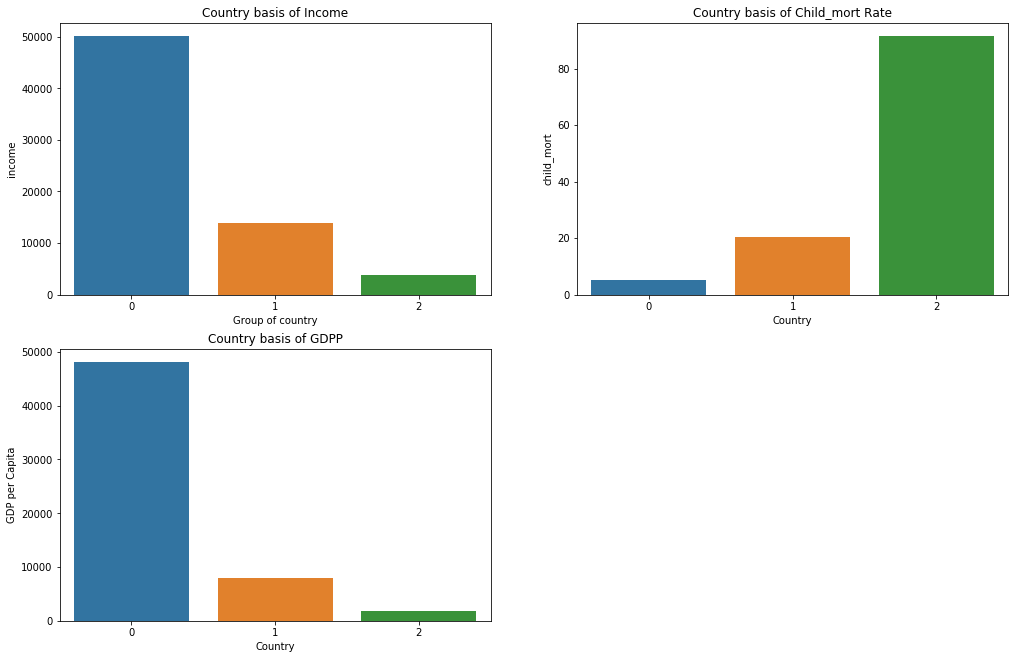

In [61]:
fig = plt.figure(figsize = (17,11))
# plot 1
plt.subplot(2, 2, 1)
sns.barplot(x=country_final1.index,y='income',data=country_final1)
plt.xlabel('Group of country', fontsize=10)
plt.title('Country basis of Income')

# plot 2
plt.subplot(2, 2, 2)
sns.barplot(x=country_final1.index,y='child_mort',data=country_final1)
plt.xlabel('Country', fontsize=10)
plt.title('Country basis of Child_mort Rate')

plt.subplot(2, 2, 3)
sns.barplot(x=country_final1.index,y='gdpp',data=country_final1)
plt.xlabel('Country', fontsize=10)
plt.ylabel('GDP per Capita', fontsize=10)
plt.title('Country basis of GDPP')


plt.show()

* PLOT 1 :
 Bar chart shows, all the developed countries are having high income per person, developing countries are having average income per person and poor countries are having the least income per person.

* PLOT 2 :
 As we see in plot all the developed countries having low number of death of children , developing countries having average  death  and poor countries having the most daeth rate.

* PLOT 3 :
 As we see in plot Developed country having High GDPP per capita , Developing country having Average GDPP per capital and Poor country having low GDPP per capita

In [62]:
#Let's use the concept of binning
fin=country_final[country_final['gdpp']<=1909]
fin=fin[fin['child_mort']>= 92]
fin=fin[fin['income']<= 3897.35]

In [63]:
fin

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id(K-means)
17,Benin,111.0,180.4040,31.0780,281.976,1820.0,0.885,61.8,5.36,758.0,2
25,Burkina Faso,116.0,110.4000,38.7550,170.200,1430.0,6.810,57.9,5.87,575.0,2
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.300,57.7,6.26,231.0,2
28,Cameroon,108.0,290.8200,67.2030,353.700,2660.0,1.910,57.3,5.11,1310.0,2
31,Central African Republic,149.0,52.6280,17.7508,118.190,888.0,2.010,47.5,5.21,446.0,2
32,Chad,150.0,330.0960,40.6341,390.195,1930.0,6.390,56.5,6.59,897.0,2
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609.0,20.800,57.5,6.54,334.0,2
40,Cote d'Ivoire,111.0,617.3200,64.6600,528.260,2690.0,5.390,56.3,5.27,1220.0,2
63,Guinea,109.0,196.3440,31.9464,279.936,1190.0,16.100,58.0,5.34,648.0,2
64,Guinea-Bissau,114.0,81.5030,46.4950,192.544,1390.0,2.970,55.6,5.05,547.0,2


In [64]:
income1=fin.nsmallest(8,'income')
income1

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id(K-means)
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609.0,20.80,57.5,6.54,334.0,2
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.30,57.7,6.26,231.0,2
112,Niger,123.0,77.2560,17.9568,170.868,814.0,2.55,58.8,7.49,348.0,2
31,Central African Republic,149.0,52.6280,17.7508,118.190,888.0,2.01,47.5,5.21,446.0,2
106,Mozambique,101.0,131.9850,21.8299,193.578,918.0,7.64,54.5,5.56,419.0,2
63,Guinea,109.0,196.3440,31.9464,279.936,1190.0,16.10,58.0,5.34,648.0,2
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220.0,17.20,55.0,5.20,399.0,2
64,Guinea-Bissau,114.0,81.5030,46.4950,192.544,1390.0,2.97,55.6,5.05,547.0,2


### We get the top 8 Country Whose Income is Low

In [65]:
gdpp1=fin.nsmallest(8,'gdpp')
gdpp1

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id(K-means)
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.30,57.7,6.26,231.0,2
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609.0,20.80,57.5,6.54,334.0,2
112,Niger,123.0,77.2560,17.9568,170.868,814.0,2.55,58.8,7.49,348.0,2
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220.0,17.20,55.0,5.20,399.0,2
106,Mozambique,101.0,131.9850,21.8299,193.578,918.0,7.64,54.5,5.56,419.0,2
31,Central African Republic,149.0,52.6280,17.7508,118.190,888.0,2.01,47.5,5.21,446.0,2
64,Guinea-Bissau,114.0,81.5030,46.4950,192.544,1390.0,2.97,55.6,5.05,547.0,2
25,Burkina Faso,116.0,110.4000,38.7550,170.200,1430.0,6.81,57.9,5.87,575.0,2


### We get the top 8 Country Whose GDPP is Very Low compare to the other Country

In [67]:
child_death_rate=fin.nsmallest(8,'child_mort')
child_death_rate

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id(K-means)
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.300,57.7,6.26,231.0,2
99,Mauritania,97.4,608.4000,52.9200,734.400,3320.0,18.900,68.2,4.98,1200.0,2
87,Lesotho,99.7,460.9800,129.8700,1181.700,2380.0,4.150,46.5,3.30,1170.0,2
106,Mozambique,101.0,131.9850,21.8299,193.578,918.0,7.640,54.5,5.56,419.0,2
28,Cameroon,108.0,290.8200,67.2030,353.700,2660.0,1.910,57.3,5.11,1310.0,2
63,Guinea,109.0,196.3440,31.9464,279.936,1190.0,16.100,58.0,5.34,648.0,2
17,Benin,111.0,180.4040,31.0780,281.976,1820.0,0.885,61.8,5.36,758.0,2
40,Cote d'Ivoire,111.0,617.3200,64.6600,528.260,2690.0,5.390,56.3,5.27,1220.0,2


### We get the top 8 Country Whose Child_mort (Death Rate) is Very High compare to the other Country

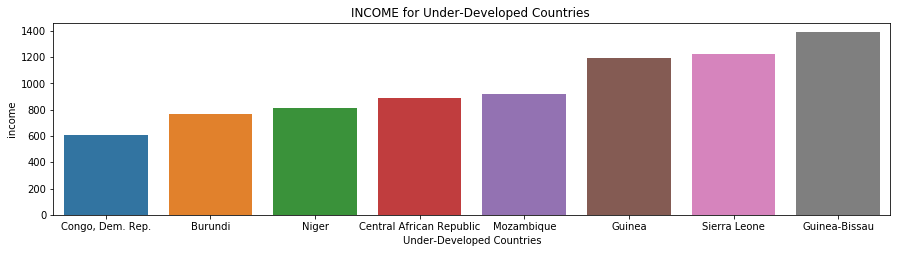

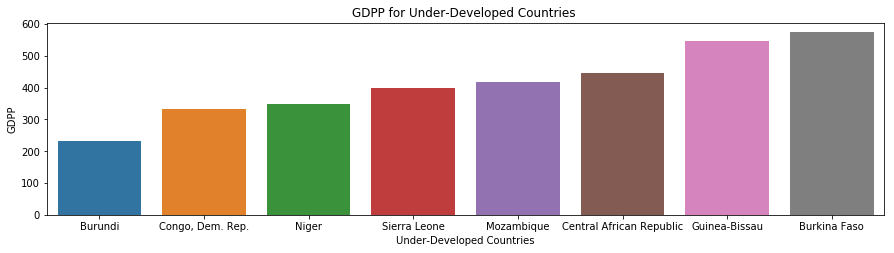

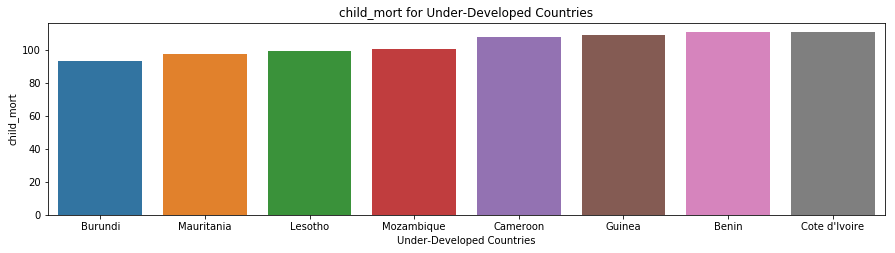

In [69]:
fig = plt.figure(figsize = (15,12))

# Plot 1
plt.subplot(3,1,1)
sns.barplot(x='country',y='income',data=income1)
plt.title('INCOME for Under-Developed Countries ')
plt.xlabel('Under-Developed Countries', fontsize=10)
plt.ylabel('income', fontsize=10)
plt.savefig("1",bbox_inches='tight')

# Plot 2
fig = plt.figure(figsize = (15,12))
plt.subplot(3,1,2)
sns.barplot(x='country',y='gdpp',data=gdpp1)
plt.title('GDPP for Under-Developed Countries ')
plt.xlabel('Under-Developed Countries', fontsize=10)
plt.ylabel('GDPP', fontsize=10)
plt.savefig("2",bbox_inches='tight')

# Plot 3
fig = plt.figure(figsize = (15,12))
plt.subplot(3,1,3)
sns.barplot(x='country',y='child_mort',data=child_death_rate)
plt.title('child_mort for Under-Developed Countries')
plt.xlabel('Under-Developed Countries', fontsize=10)
plt.ylabel('child_mort', fontsize=10)
plt.savefig("3",bbox_inches='tight')
plt.show()

###  Lets Make the BoxPlot for GDPP,INCOME,CHILD_MORT

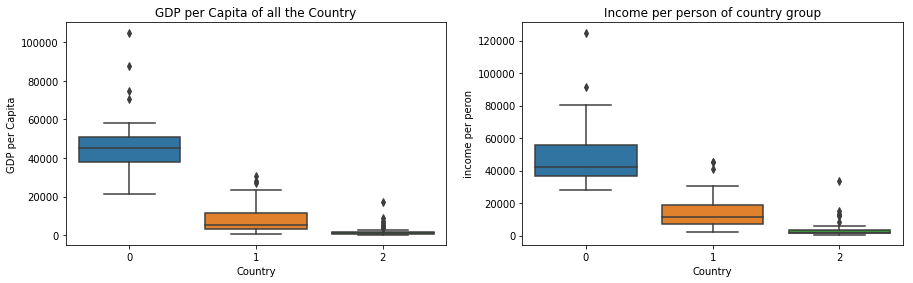

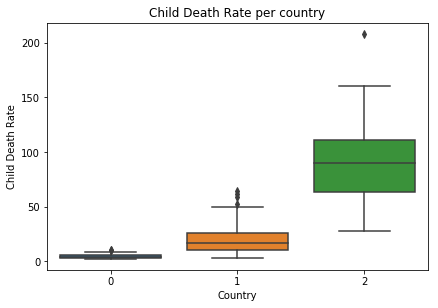

In [70]:
fig = plt.figure(figsize = (15,9))

# plot 1
plt.subplot(2, 2, 1)
sns.boxplot(x='cluster_id(K-means)',y='gdpp',data=country_final)
plt.xlabel('Country', fontsize=10)
plt.ylabel('GDP per Capita', fontsize=10)
plt.title('GDP per Capita of all the Country')

# plot 2
plt.subplot(2, 2, 2)
sns.boxplot(x='cluster_id(K-means)',y='income',data=country_final)
plt.xlabel('Country', fontsize=10)
plt.ylabel('income per peron', fontsize=10)
plt.title('Income per person of country group')

# plot 3
fig = plt.figure(figsize = (15,10))
plt.subplot(2, 2, 3)
sns.boxplot(x='cluster_id(K-means)',y='child_mort',data=country_final)
plt.xlabel('Country', fontsize=10)
plt.ylabel('Child Death Rate', fontsize=10)
plt.title('Child Death Rate per country')

plt.show()

- Developed country fall under 0 cluster ,developing country fall under 1 cluster and Poor country fall under 2 cluster
- As we see in plot no 3 poor country fall under cluster 2 so it means it has more child death rate

### Lets make the Scatterplot.

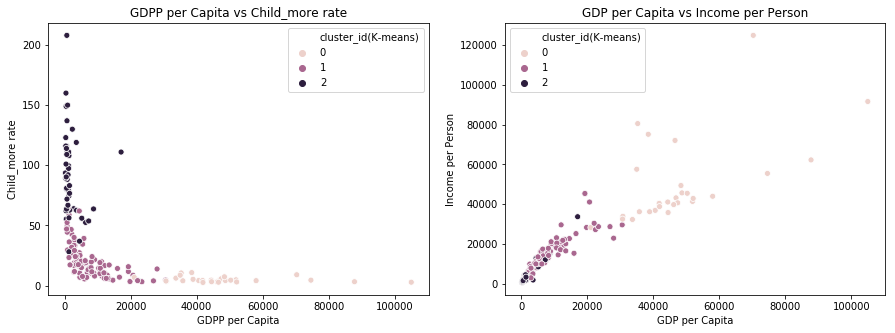

In [71]:
fig = plt.figure(figsize = (15,5))

plt.subplot(1, 2, 1)
sns.scatterplot(x='gdpp',y='child_mort',hue='cluster_id(K-means)',data=country_final)
plt.xlabel('GDPP per Capita', fontsize=10)
plt.ylabel('Child_more rate', fontsize=10)
plt.title('GDPP per Capita vs Child_more rate')

plt.subplot(1, 2, 2)
sns.scatterplot(x='gdpp',y='income',hue='cluster_id(K-means)',legend='full',data=country_final)
plt.xlabel('GDP per Capita', fontsize=10)
plt.ylabel('Income per Person', fontsize=10)
plt.title('GDP per Capita vs Income per Person')


plt.show()

- We can see the Three different color cluster group 0 for developed country , 1 for developing country , 2 for poor country with Different attribute

In [72]:
Developed_county=country_final[country_final['cluster_id(K-means)']==0]
Developing_country=country_final[country_final['cluster_id(K-means)']==1]
Poor_country=country_final[country_final['cluster_id(K-means)']==2]

In [74]:
Developed_county.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id(K-means)
7,Australia,4.8,10276.2,4530.87,10847.1,41400.0,1.160,82.0,1.93,51900.0,0
8,Austria,4.3,24059.7,5159.00,22418.2,43200.0,0.873,80.5,1.44,46900.0,0
15,Belgium,4.5,33921.6,4750.80,33166.8,41100.0,1.880,80.0,1.86,44400.0,0
23,Brunei,10.5,23792.2,1002.52,9884.0,80600.0,16.700,77.1,1.84,35300.0,0
29,Canada,5.6,13793.4,5356.20,14694.0,40700.0,2.870,81.3,1.63,47400.0,0


In [75]:
Developing_country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id(K-means)
1,Albania,16.6,1145.20,267.895,1987.74,9930.0,4.49,76.3,1.65,4090.0,1
2,Algeria,27.3,1712.64,185.982,1400.44,12900.0,16.10,76.5,2.89,4460.0,1
4,Antigua and Barbuda,10.3,5551.00,735.660,7185.80,19100.0,1.44,76.8,2.13,12200.0,1
5,Argentina,14.5,1946.70,834.300,1648.00,18700.0,20.90,75.8,2.37,10300.0,1
6,Armenia,18.1,669.76,141.680,1458.66,6700.0,7.77,73.3,1.69,3220.0,1


In [76]:
Poor_country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id(K-means)
0,Afghanistan,90.2,55.300,41.9174,248.297,1610.0,9.440,56.2,5.82,553.0,2
3,Angola,119.0,2199.190,100.6050,1514.370,5900.0,22.400,60.1,6.16,3530.0,2
17,Benin,111.0,180.404,31.0780,281.976,1820.0,0.885,61.8,5.36,758.0,2
21,Botswana,52.5,2768.600,527.0500,3257.550,13300.0,8.920,57.1,2.88,6350.0,2
25,Burkina Faso,116.0,110.400,38.7550,170.200,1430.0,6.810,57.9,5.87,575.0,2


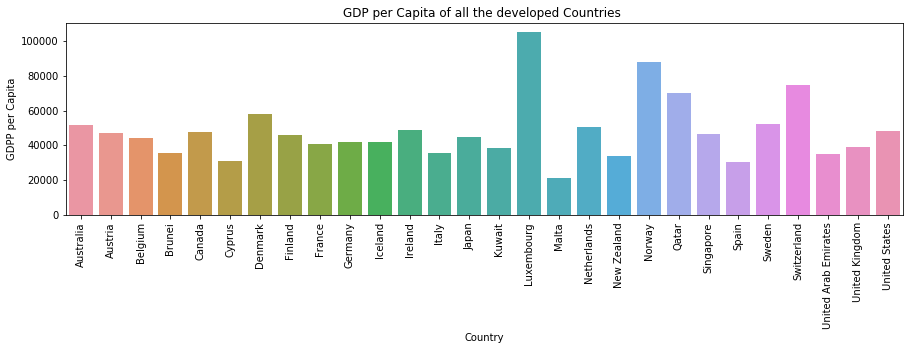

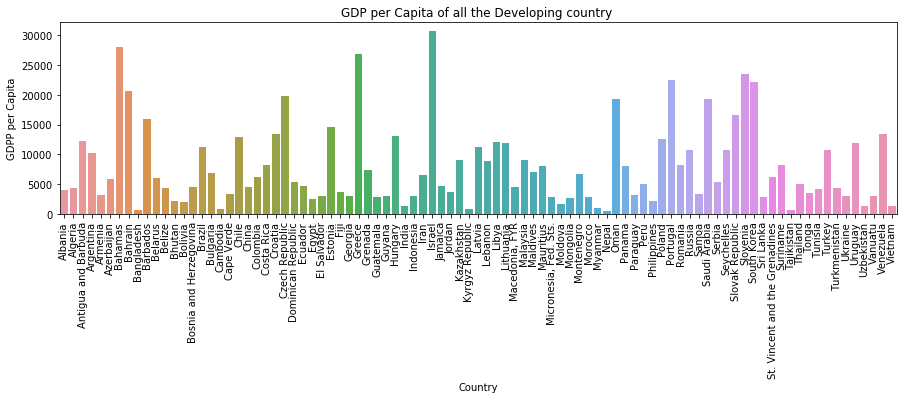

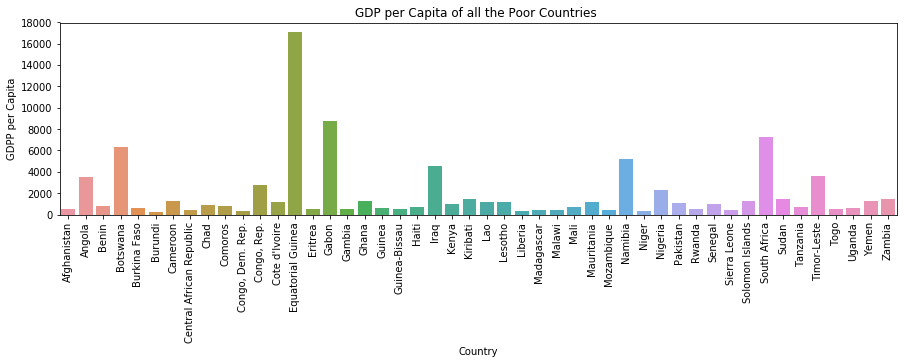

In [78]:
fig = plt.figure(figsize = (15,12))

# Plot 1
plt.subplot(3,1,1)
n=sns.barplot(x='country',y='gdpp',data=Developed_county)
n.set_xticklabels(n.get_xticklabels(),rotation=90)
plt.xlabel('Country', fontsize=10)
plt.ylabel('GDPP per Capita', fontsize=10)
plt.title('GDP per Capita of all the developed Countries ')
plt.savefig("4",bbox_inches='tight')

# Plot 2
fig = plt.figure(figsize = (15,12))
plt.subplot(3,1,2)
n=sns.barplot(x='country',y='gdpp',data=Developing_country)
n.set_xticklabels(n.get_xticklabels(),rotation=90)
plt.xlabel('Country', fontsize=10)
plt.ylabel('GDPP per Capita', fontsize=10)
plt.title('GDP per Capita of all the Developing country ')
plt.savefig("5",bbox_inches='tight')

# Plot 1
fig = plt.figure(figsize = (15,12))
plt.subplot(3,1,3)
n=sns.barplot(x='country',y='gdpp',data=Poor_country)
n.set_xticklabels(n.get_xticklabels(),rotation=90)
plt.xlabel('Country', fontsize=10)
plt.ylabel('GDPP per Capita', fontsize=10)
plt.title('GDP per Capita of all the Poor Countries ')
plt.savefig("6",bbox_inches='tight')

- PLOT 1 : 
  we can see all the Developed countries like Luxembourg, Australia,Norway,Qater etc.
  
- PLOT 2 :
  we can see all the Developing countries like India,Isreal,Iran, Albania, etc.
  
- PLOT 3 :
  we can see all the Poor countries like Bruundi,Nigar,Afghanisthan etc.

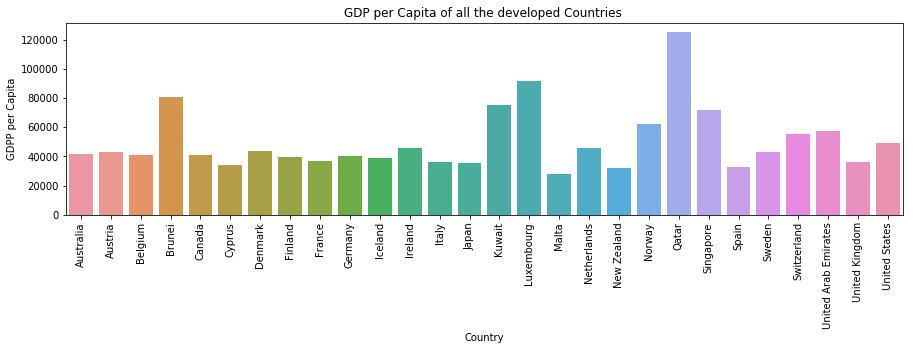

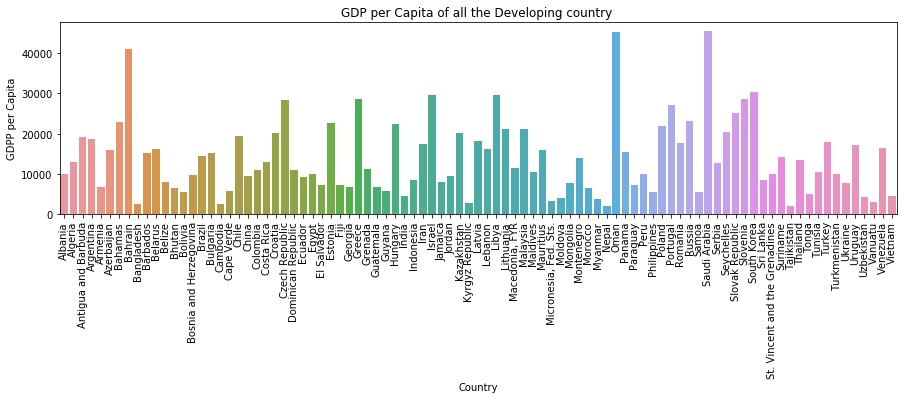

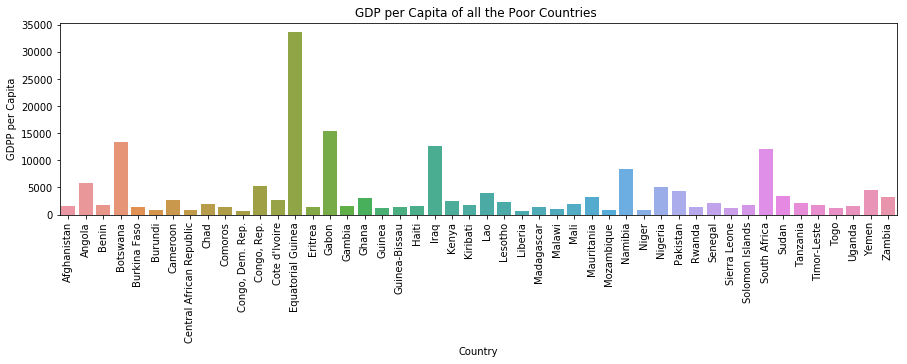

In [79]:
fig = plt.figure(figsize = (15,12))

# Plot 1
plt.subplot(3,1,1)
n=sns.barplot(x='country',y='income',data=Developed_county)
n.set_xticklabels(n.get_xticklabels(),rotation=90)
plt.xlabel('Country', fontsize=10)
plt.ylabel('GDPP per Capita', fontsize=10)
plt.title('GDP per Capita of all the developed Countries ')
plt.savefig("7",bbox_inches='tight')

# Plot 2
fig = plt.figure(figsize = (15,12))
plt.subplot(3,1,2)
n=sns.barplot(x='country',y='income',data=Developing_country)
n.set_xticklabels(n.get_xticklabels(),rotation=90)
plt.xlabel('Country', fontsize=10)
plt.ylabel('GDPP per Capita', fontsize=10)
plt.title('GDP per Capita of all the Developing country ')
plt.savefig("8",bbox_inches='tight')

# Plot 1
fig = plt.figure(figsize = (15,12))
plt.subplot(3,1,3)
n=sns.barplot(x='country',y='income',data=Poor_country)
n.set_xticklabels(n.get_xticklabels(),rotation=90)
plt.xlabel('Country', fontsize=10)
plt.ylabel('GDPP per Capita', fontsize=10)
plt.title('GDP per Capita of all the Poor Countries ')
plt.savefig("9",bbox_inches='tight')

- As we see in above plot income per capital for all country with Developed country , developing country,Poor country.

Text(0.5,1,'GDP per Capita of all the Poor Countries ')

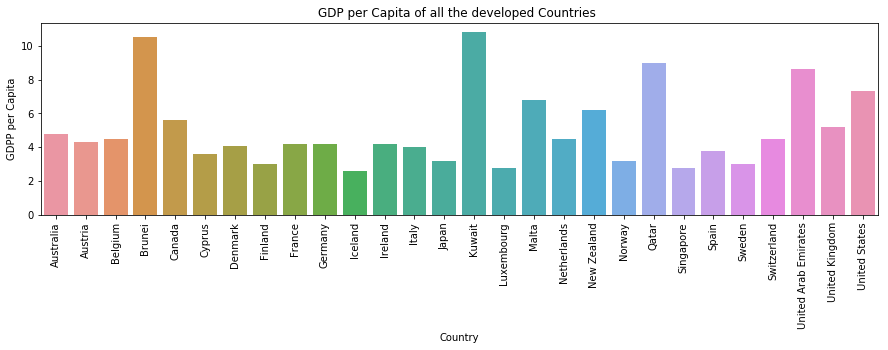

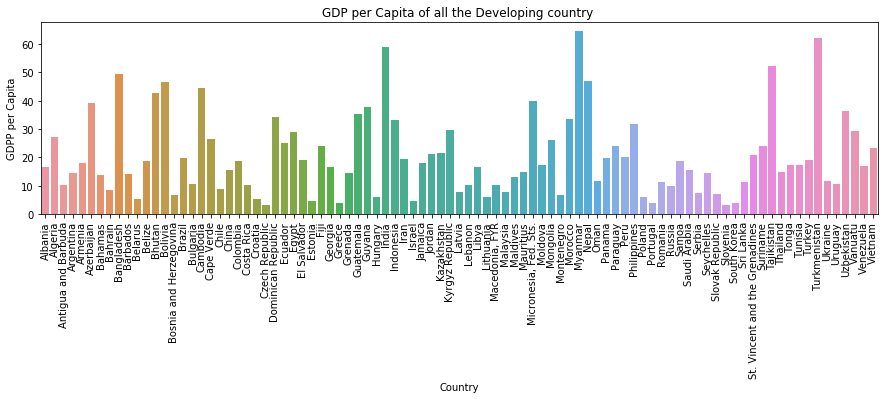

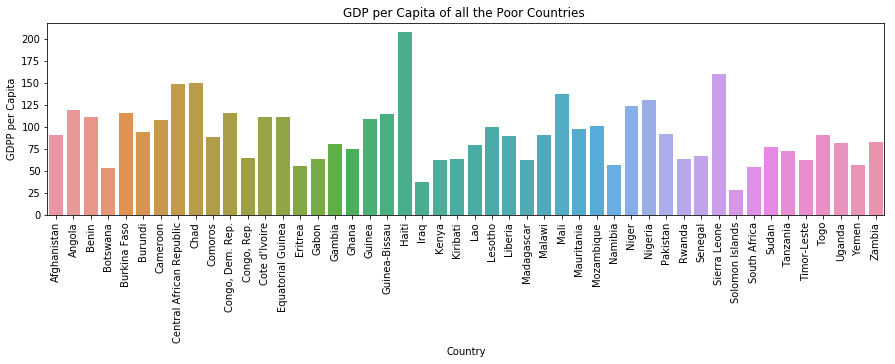

In [80]:
fig = plt.figure(figsize = (15,12))

# Plot 1
plt.subplot(3,1,1)
n=sns.barplot(x='country',y='child_mort',data=Developed_county)
n.set_xticklabels(n.get_xticklabels(),rotation=90)
plt.xlabel('Country', fontsize=10)
plt.ylabel('GDPP per Capita', fontsize=10)
plt.title('GDP per Capita of all the developed Countries ')

# Plot 2
fig = plt.figure(figsize = (15,12))
plt.subplot(3,1,2)
n=sns.barplot(x='country',y='child_mort',data=Developing_country)
n.set_xticklabels(n.get_xticklabels(),rotation=90)
plt.xlabel('Country', fontsize=10)
plt.ylabel('GDPP per Capita', fontsize=10)
plt.title('GDP per Capita of all the Developing country ')

# Plot 1
fig = plt.figure(figsize = (15,12))
plt.subplot(3,1,3)
n=sns.barplot(x='country',y='child_mort',data=Poor_country)
n.set_xticklabels(n.get_xticklabels(),rotation=90)
plt.xlabel('Country', fontsize=10)
plt.ylabel('GDPP per Capita', fontsize=10)
plt.title('GDP per Capita of all the Poor Countries ')

- in above plot we can see the child_mort (Death Rate) per country for all developed country,developing country,poor country 

## Step 10 : Perform Hierarchical Clustering

In [81]:
country5.head()

,PC1,PC2,PC3,PC4,PC5,cluster_id(K-means)
0,-2.636338,1.472260,-0.548330,0.238302,0.061003,2
1,-0.023783,-1.435535,-0.015470,-0.428278,-0.154305,1
2,-0.459228,-0.679705,0.956537,-0.193531,-0.092128,1
3,-2.723472,2.174966,0.597397,0.417695,0.056694,2
4,0.649103,-1.026404,-0.258645,-0.276882,0.077087,1


In [82]:
# pop the country from the dataset before scaling
z = country5.pop("cluster_id(K-means)")

In [83]:
country5.head()

,PC1,PC2,PC3,PC4,PC5
0,-2.636338,1.472260,-0.548330,0.238302,0.061003
1,-0.023783,-1.435535,-0.015470,-0.428278,-0.154305
2,-0.459228,-0.679705,0.956537,-0.193531,-0.092128
3,-2.723472,2.174966,0.597397,0.417695,0.056694
4,0.649103,-1.026404,-0.258645,-0.276882,0.077087


### 10.1 Single Linkage

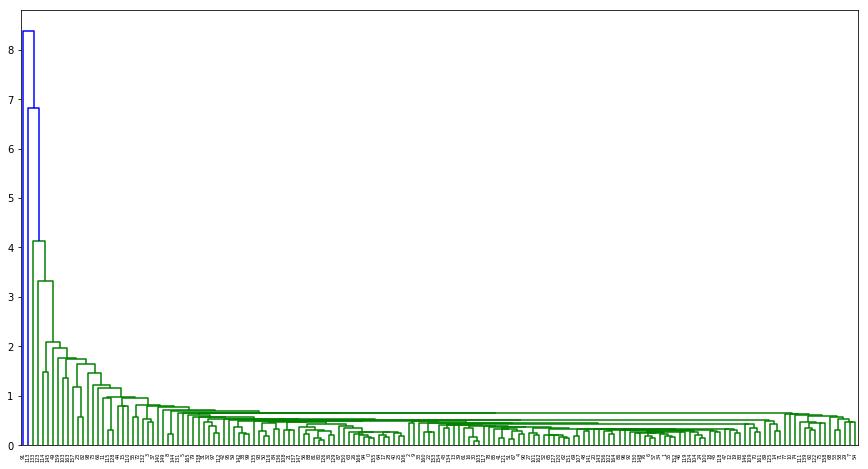

In [84]:
# single linkage
fig = plt.figure(figsize=[15,8])
merging = linkage(country5, method="single", metric='euclidean')
dendrogram(merging)
plt.show()

### 10.2 Complete Linkage

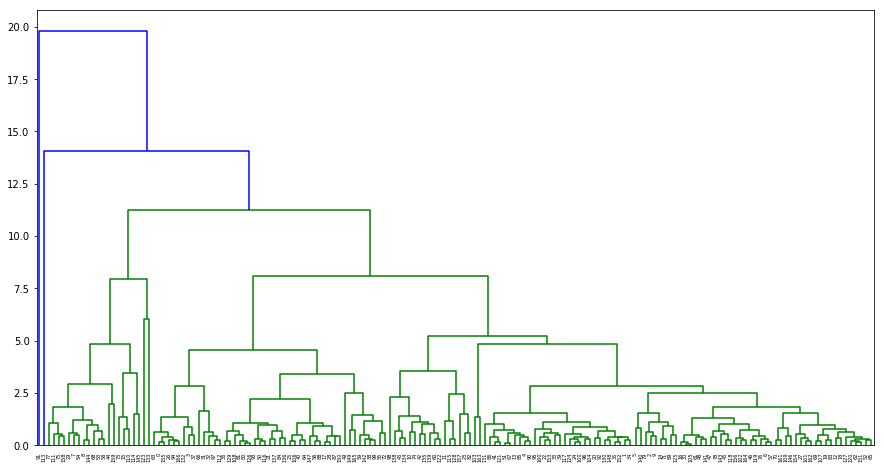

In [85]:
# complete linkage
fig = plt.figure(figsize=[15,8])
merging = linkage(country4, method="complete", metric='euclidean')
dendrogram(merging)
plt.show()

In [86]:
# Average linkage
# merging = linkage(country4, method="average", metric='euclidean')
# dendrogram(merging)
# plt.show()

In [87]:
# From the Complete linkage we decide to cut the tree at 3 cluster
cluster_labels = cut_tree(merging, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [88]:
#assign cluster labels

country5['Cluster_lables(Hierarchical)']=cluster_labels
country5.head()

,PC1,PC2,PC3,PC4,PC5,Cluster_lables(Hierarchical)
0,-2.636338,1.472260,-0.548330,0.238302,0.061003,0
1,-0.023783,-1.435535,-0.015470,-0.428278,-0.154305,0
2,-0.459228,-0.679705,0.956537,-0.193531,-0.092128,0
3,-2.723472,2.174966,0.597397,0.417695,0.056694,0
4,0.649103,-1.026404,-0.258645,-0.276882,0.077087,0


In [89]:
country5['Cluster_lables(Hierarchical)'].value_counts()

0    165
2      1
1      1
Name: Cluster_lables(Hierarchical), dtype: int64

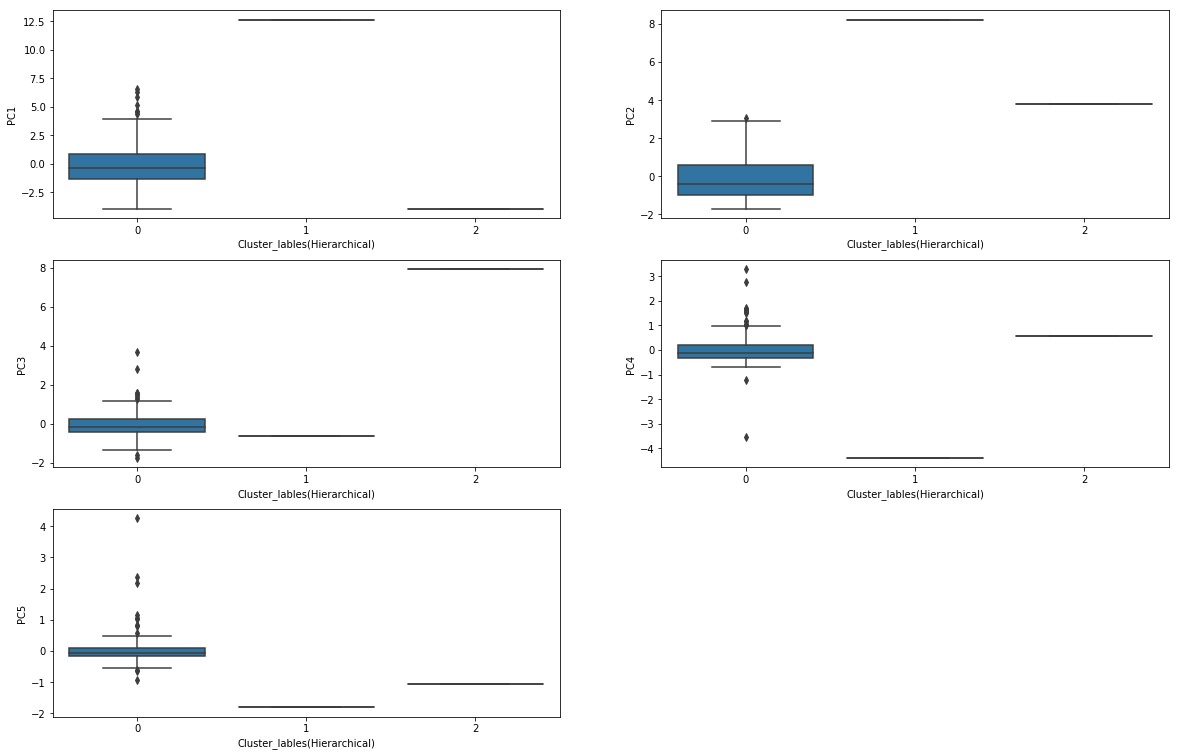

In [90]:
# plot
fig = plt.figure(figsize=[20,13])
plt.subplot(3, 2, 1)
sns.boxplot(x='Cluster_lables(Hierarchical)', y='PC1', data=country5)

plt.subplot(3, 2, 2)
sns.boxplot(x='Cluster_lables(Hierarchical)', y='PC2', data=country5)

plt.subplot(3, 2, 3)
sns.boxplot(x='Cluster_lables(Hierarchical)', y='PC3', data=country5)

plt.subplot(3, 2, 4)
sns.boxplot(x='Cluster_lables(Hierarchical)', y='PC4', data=country5)

plt.subplot(3, 2, 5)
sns.boxplot(x='Cluster_lables(Hierarchical)', y='PC5', data=country5)

In [91]:
country_final.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id(K-means)
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,2
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,2
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,1


In [92]:
country7 = pd.merge(country_final,country5, left_index=True,right_index=True)
country7.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id(K-means),PC1,PC2,PC3,PC4,PC5,Cluster_lables(Hierarchical)
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,2,-2.636338,1.472260,-0.548330,0.238302,0.061003,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,1,-0.023783,-1.435535,-0.015470,-0.428278,-0.154305,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,1,-0.459228,-0.679705,0.956537,-0.193531,-0.092128,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,2,-2.723472,2.174966,0.597397,0.417695,0.056694,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,1,0.649103,-1.026404,-0.258645,-0.276882,0.077087,0


In [93]:
country7=country7.drop(['PC1','PC2','PC3','PC4','PC5'],axis=1)
country7.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id(K-means),Cluster_lables(Hierarchical)
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,2,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,1,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,1,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,2,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,1,0


## Step 10.3 : Analyse the Hierarchical cluster

In [94]:
clu_gdpp1      = pd.DataFrame(country7.groupby(["Cluster_lables(Hierarchical)"]).gdpp.mean())
clu_child_mort1= pd.DataFrame(country7.groupby(["Cluster_lables(Hierarchical)"]).child_mort.mean())
clu_income1    = pd.DataFrame(country7.groupby(["Cluster_lables(Hierarchical)"]).income.mean())

In [95]:
#clu_gdpp1

In [96]:
country_final2 = pd.concat([clu_gdpp1,clu_child_mort1,clu_income1], axis=1)

In [97]:
country_final2.columns = ["gdpp","child_mort","income"]
country_final2

,gdpp,child_mort,income
Cluster_lables(Hierarchical),,,
0,12470.812121,37.929091,16765.533333
1,105000.000000,2.800000,91700.000000
2,2330.000000,130.000000,5150.000000


In [98]:
# merge the Country with original Dataset
country8 = pd.concat([y,country], axis=1)
country8.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0


In [99]:
#Let's use the concept of binning
fin1=country7[country7['gdpp']<=2330.000000]
fin1=fin[fin['child_mort']>= 130.000000]
fin1=fin[fin['income']<= 5150.000000]

In [100]:
fin1.head(8)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id(K-means)
17,Benin,111.0,180.4040,31.0780,281.976,1820.0,0.885,61.8,5.36,758.0,2
25,Burkina Faso,116.0,110.4000,38.7550,170.200,1430.0,6.810,57.9,5.87,575.0,2
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.300,57.7,6.26,231.0,2
28,Cameroon,108.0,290.8200,67.2030,353.700,2660.0,1.910,57.3,5.11,1310.0,2
31,Central African Republic,149.0,52.6280,17.7508,118.190,888.0,2.010,47.5,5.21,446.0,2
32,Chad,150.0,330.0960,40.6341,390.195,1930.0,6.390,56.5,6.59,897.0,2
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609.0,20.800,57.5,6.54,334.0,2
40,Cote d'Ivoire,111.0,617.3200,64.6600,528.260,2690.0,5.390,56.3,5.27,1220.0,2


In [101]:
fin1=pd.merge(fin1,country4,left_index=True,right_index=True)

In [102]:
fin1=fin1.drop(['PC1','PC2','PC3','PC4','PC5'],axis=1)
fin1.shape

(17, 12)

In [103]:
fin1

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id(K-means),Cluster_lables(Hierarchical)
17,Benin,111.0,180.4040,31.0780,281.976,1820.0,0.885,61.8,5.36,758.0,2,0
25,Burkina Faso,116.0,110.4000,38.7550,170.200,1430.0,6.810,57.9,5.87,575.0,2,0
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.300,57.7,6.26,231.0,2,0
28,Cameroon,108.0,290.8200,67.2030,353.700,2660.0,1.910,57.3,5.11,1310.0,2,0
31,Central African Republic,149.0,52.6280,17.7508,118.190,888.0,2.010,47.5,5.21,446.0,2,0
32,Chad,150.0,330.0960,40.6341,390.195,1930.0,6.390,56.5,6.59,897.0,2,0
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609.0,20.800,57.5,6.54,334.0,2,0
40,Cote d'Ivoire,111.0,617.3200,64.6600,528.260,2690.0,5.390,56.3,5.27,1220.0,2,0
63,Guinea,109.0,196.3440,31.9464,279.936,1190.0,16.100,58.0,5.34,648.0,2,0
64,Guinea-Bissau,114.0,81.5030,46.4950,192.544,1390.0,2.970,55.6,5.05,547.0,2,0


### Lets make the Box plot

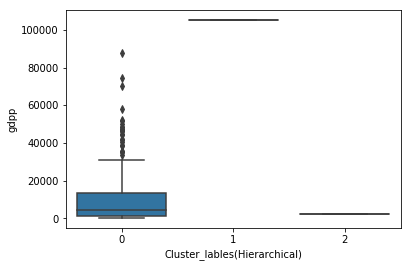

In [104]:
sns.boxplot(x='Cluster_lables(Hierarchical)',y='gdpp',data=country7)
plt.show()

- Developed countries are falling under 2nd cluster because of high gdpp range. Poor countries are falling under cluster 0.

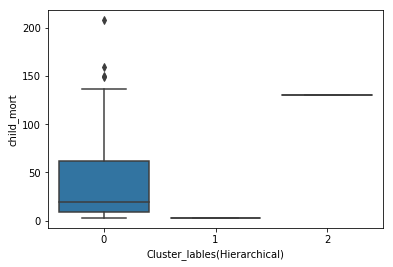

In [105]:
sns.boxplot(x='Cluster_lables(Hierarchical)',y='child_mort',data=country7)
plt.show()

- From the above plots we can see poor countries are falling under cluster 0. So, the child_mort rate is more in these countries.

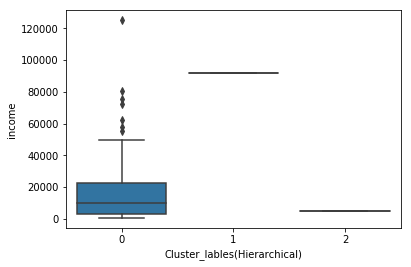

In [106]:
sns.boxplot(x='Cluster_lables(Hierarchical)',y='income',data=country7)
plt.show()

- Here, As Developed countries are falling under cluster 1, So the income is in high range

In [107]:
fin1.nsmallest(8,'gdpp')

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id(K-means),Cluster_lables(Hierarchical)
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.30,57.7,6.26,231.0,2,0
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609.0,20.80,57.5,6.54,334.0,2,0
112,Niger,123.0,77.2560,17.9568,170.868,814.0,2.55,58.8,7.49,348.0,2,0
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220.0,17.20,55.0,5.20,399.0,2,0
106,Mozambique,101.0,131.9850,21.8299,193.578,918.0,7.64,54.5,5.56,419.0,2,0
31,Central African Republic,149.0,52.6280,17.7508,118.190,888.0,2.01,47.5,5.21,446.0,2,0
64,Guinea-Bissau,114.0,81.5030,46.4950,192.544,1390.0,2.97,55.6,5.05,547.0,2,0
25,Burkina Faso,116.0,110.4000,38.7550,170.200,1430.0,6.81,57.9,5.87,575.0,2,0


In [108]:
fin1.nsmallest(8,'income')

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id(K-means),Cluster_lables(Hierarchical)
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609.0,20.80,57.5,6.54,334.0,2,0
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.30,57.7,6.26,231.0,2,0
112,Niger,123.0,77.2560,17.9568,170.868,814.0,2.55,58.8,7.49,348.0,2,0
31,Central African Republic,149.0,52.6280,17.7508,118.190,888.0,2.01,47.5,5.21,446.0,2,0
106,Mozambique,101.0,131.9850,21.8299,193.578,918.0,7.64,54.5,5.56,419.0,2,0
63,Guinea,109.0,196.3440,31.9464,279.936,1190.0,16.10,58.0,5.34,648.0,2,0
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220.0,17.20,55.0,5.20,399.0,2,0
64,Guinea-Bissau,114.0,81.5030,46.4950,192.544,1390.0,2.97,55.6,5.05,547.0,2,0


In [109]:
fin1.nsmallest(8,'child_mort')

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id(K-means),Cluster_lables(Hierarchical)
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.300,57.7,6.26,231.0,2,0
99,Mauritania,97.4,608.4000,52.9200,734.400,3320.0,18.900,68.2,4.98,1200.0,2,0
87,Lesotho,99.7,460.9800,129.8700,1181.700,2380.0,4.150,46.5,3.30,1170.0,2,0
106,Mozambique,101.0,131.9850,21.8299,193.578,918.0,7.640,54.5,5.56,419.0,2,0
28,Cameroon,108.0,290.8200,67.2030,353.700,2660.0,1.910,57.3,5.11,1310.0,2,0
63,Guinea,109.0,196.3440,31.9464,279.936,1190.0,16.100,58.0,5.34,648.0,2,0
17,Benin,111.0,180.4040,31.0780,281.976,1820.0,0.885,61.8,5.36,758.0,2,0
40,Cote d'Ivoire,111.0,617.3200,64.6600,528.260,2690.0,5.390,56.3,5.27,1220.0,2,0


- After comparing both K-means and Heirarchical clustering method.
  I am going with the K-means outcomes as the plots are clearly visible. As in both the methods, the top 8 under-developed    countries are similar. I am considering the result of k-means outcome.

# Conclusion

# Finally, as per categories of the countries, 
# Top 8 under-developed countries which are in direst need of aid are as below:

1. Burundi
2. Congo, Dem. Rep.
3. Niger
4. Sierra Leone
5. Central African Republic
6. Mozambique
7. Guinea-Bissau	
8. Burkina Faso